In [4]:
# Importing libraries
from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
from quickda.explore_time_series import *

import matplotlib.pyplot as plt

import pandas as pd

import os

In [5]:
parent_folder = os.path.dirname(os.getcwd())

In [6]:
aviation_data_path = os.path.join(
    parent_folder, 'data', 'clean_aviation_data_2.csv')
data = pd.read_csv(aviation_data_path, encoding='latin-1')

viz_aviation_data_path = os.path.join(
    parent_folder, 'data', 'viz_aviation_data.csv')
data_2 = pd.read_csv(viz_aviation_data_path, encoding='latin-1')


encod_aviation_data_path = os.path.join(
    parent_folder, 'data', 'encoded_aviation_data_3.csv')
data_3 = pd.read_csv(encod_aviation_data_path, encoding='latin-1')

In [7]:
data_2['make'].value_counts()

CESSNA           16889
PIPER             9134
BEECH             3167
BELL              1489
GRUMMAN            945
                 ...  
HALL-CAVALIER        1
HALLAM               1
HALLETT              1
HALLQUIST            1
ZWART                1
Name: make, Length: 3214, dtype: int64

In [8]:
len(data_2['make'].unique())

3214

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'target'}>,
        <Axes: title={'center': 'location'}>,
        <Axes: title={'center': 'aircraft_damage'}>],
       [<Axes: title={'center': 'make'}>,
        <Axes: title={'center': 'model'}>,
        <Axes: title={'center': 'number_of_engines'}>,
        <Axes: title={'center': 'engine_type'}>],
       [<Axes: title={'center': 'weather_conditions'}>,
        <Axes: title={'center': 'phase_of_flight'}>,
        <Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Month'}>],
       [<Axes: title={'center': 'Day'}>,
        <Axes: title={'center': 'injuries'}>,
        <Axes: title={'center': 'pax_onboard'}>,
        <Axes: title={'center': 'fatality_percentage'}>],
       [<Axes: title={'center': 'survived'}>,
        <Axes: title={'center': 'amateur_built'}>, <Axes: >, <Axes: >]],
      dtype=object)

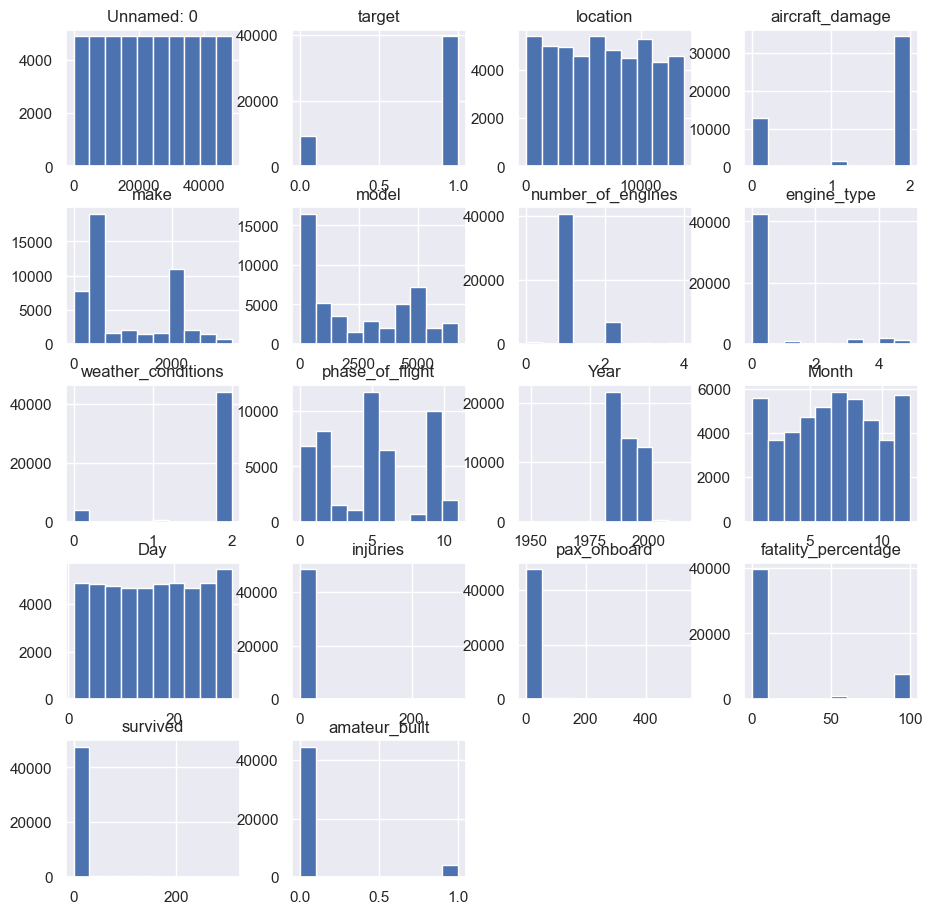

In [9]:
data_3[data_3.dtypes[(data_3.dtypes=="float64")|(data_3.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'number_of_engines'}>,
        <Axes: title={'center': 'Year'}>],
       [<Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Day'}>,
        <Axes: title={'center': 'injuries'}>],
       [<Axes: title={'center': 'pax_onboard'}>,
        <Axes: title={'center': 'fatality_percentage'}>,
        <Axes: title={'center': 'survived'}>]], dtype=object)

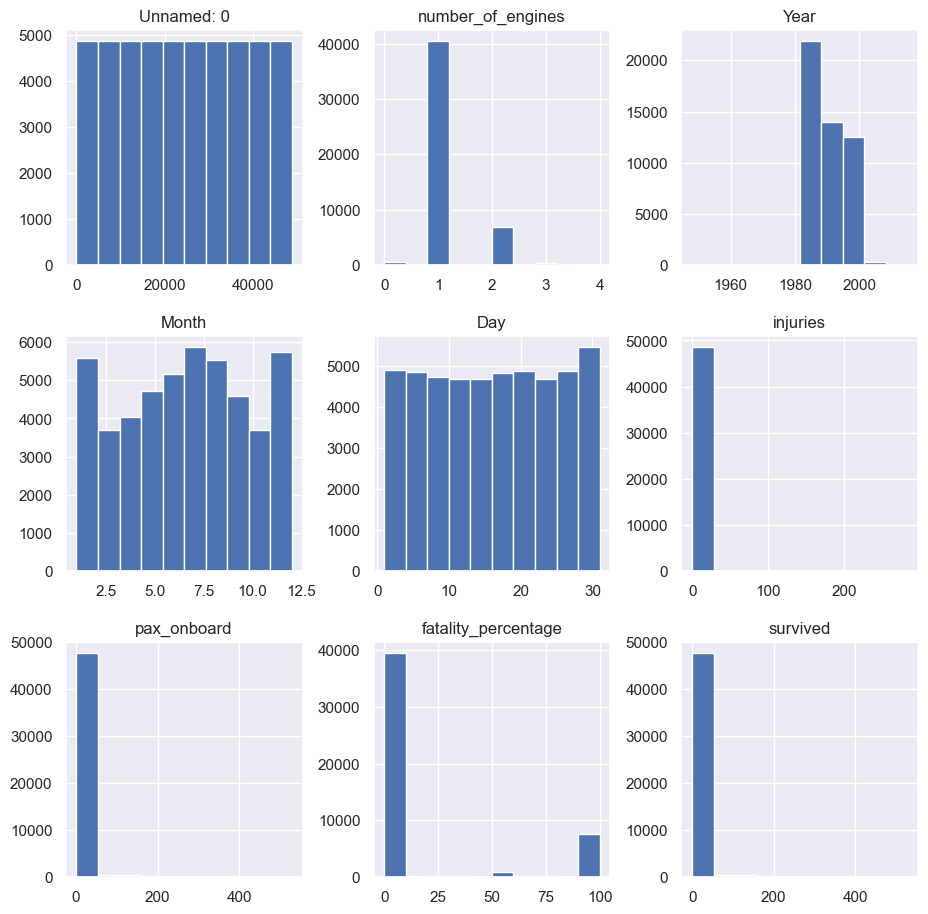

In [10]:
data_2[data_2.dtypes[(data_2.dtypes=="float64")|(data_2.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])

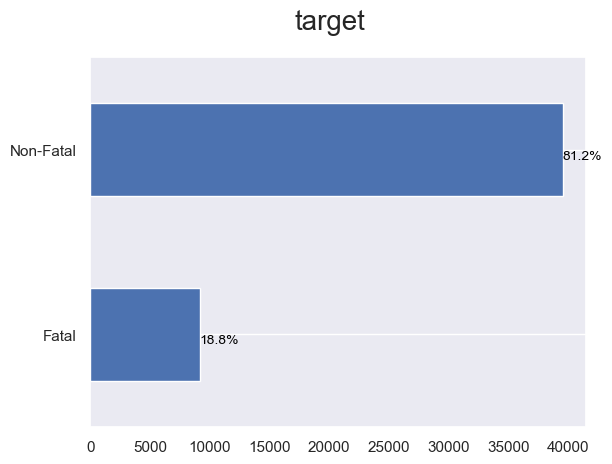

<Figure size 640x480 with 0 Axes>

In [13]:
#plot target variables 


y = "target"
ax = data_2[y].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(y, fontsize=20)
plt.show()

plt_save_path = os.path.join(
    parent_folder, 'imgs', 'target_bar.png')

plt.savefig(plt_save_path)

In [14]:
#Up to 300 passengers survived and about 550 didn’t, in other words the survival rate (or the population mean) is 38%.


Outlier Analysis - Boxplot


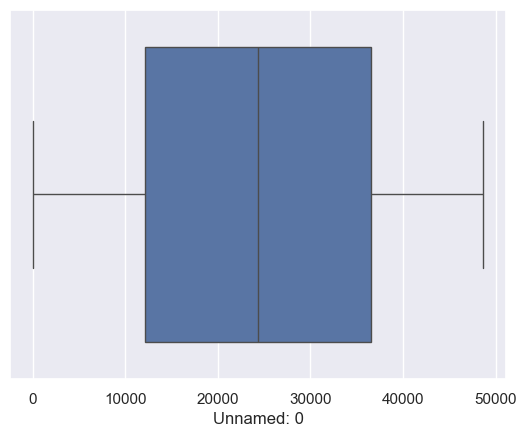

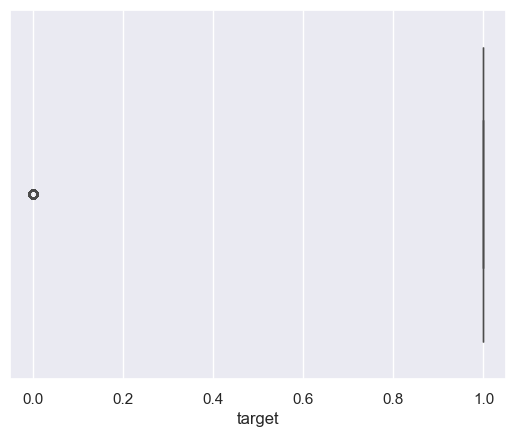

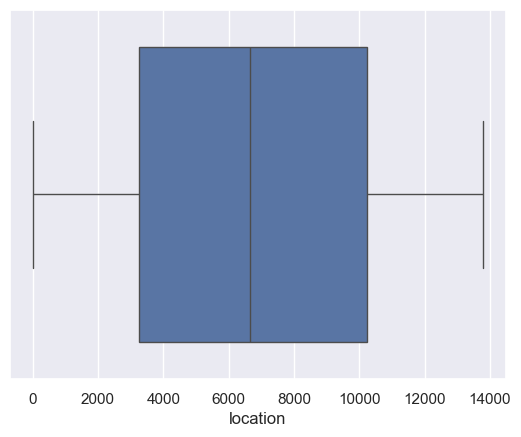

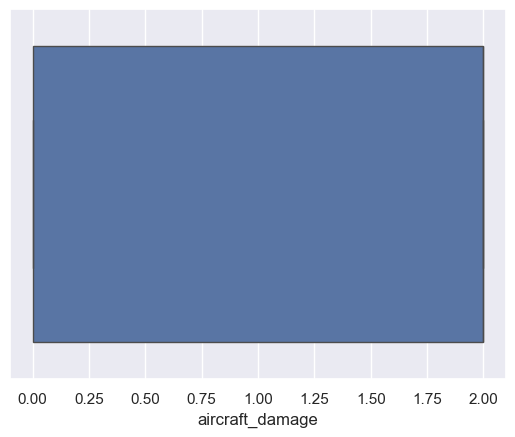

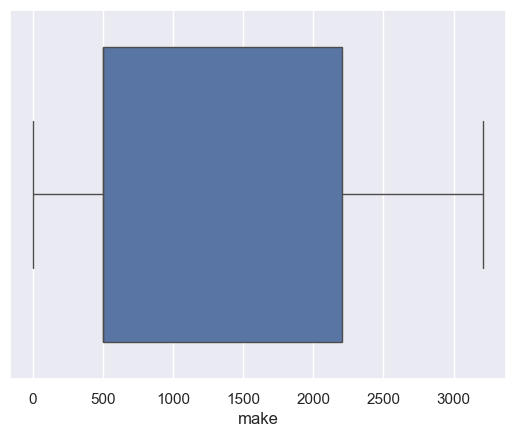

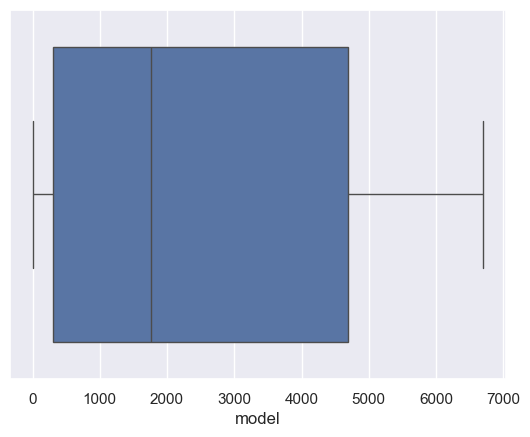

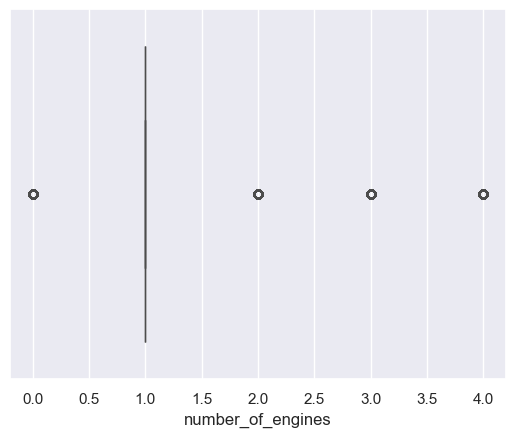

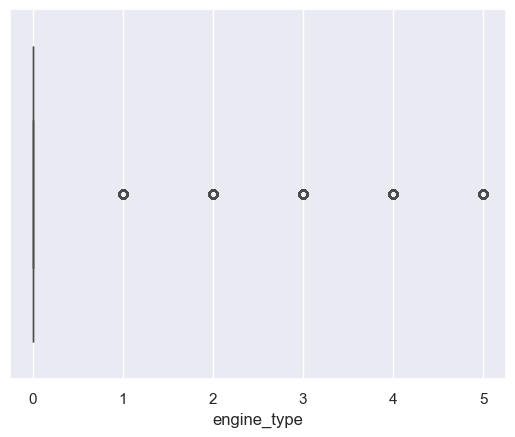

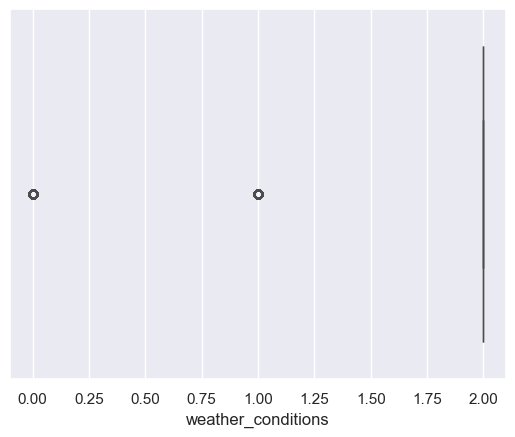

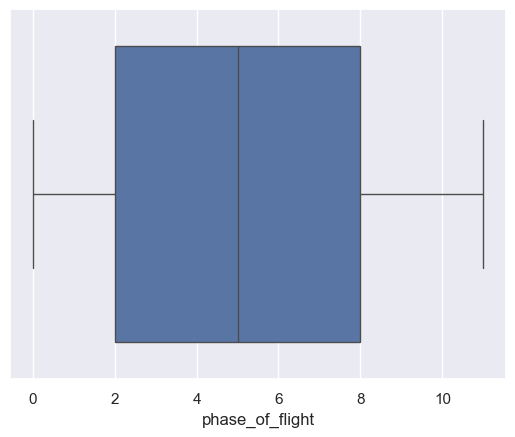

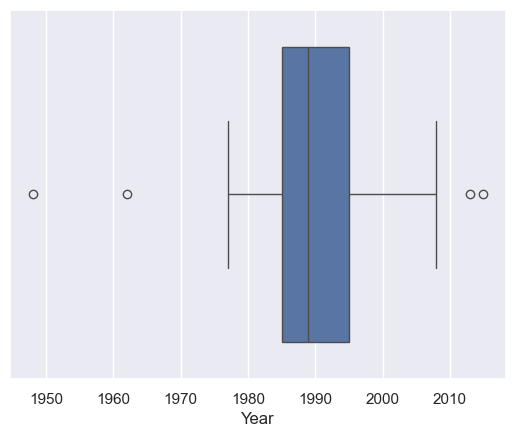

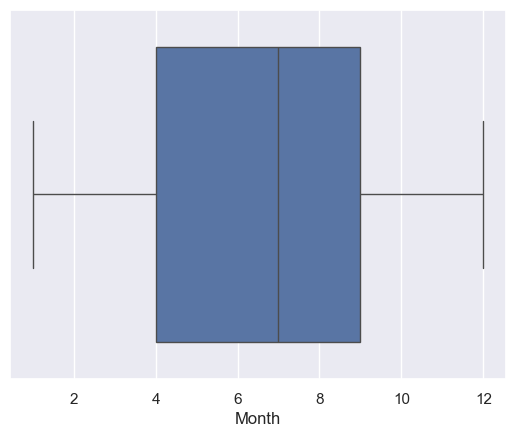

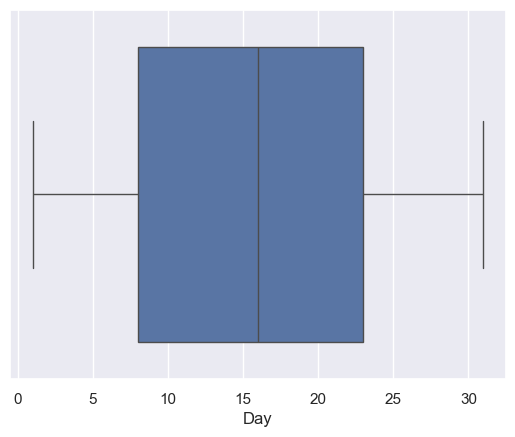

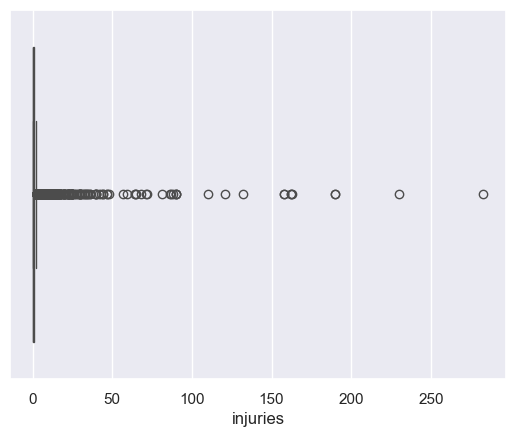

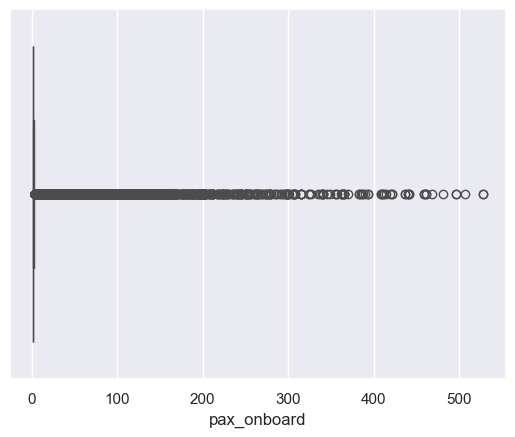

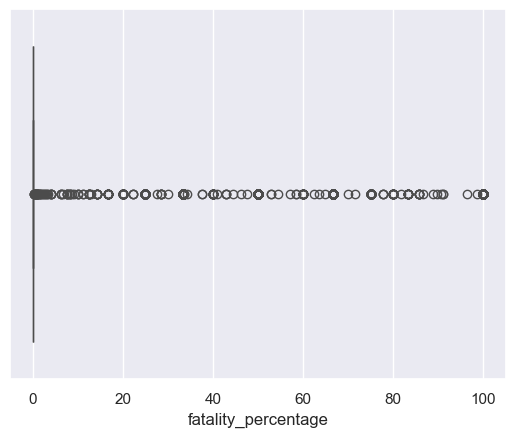

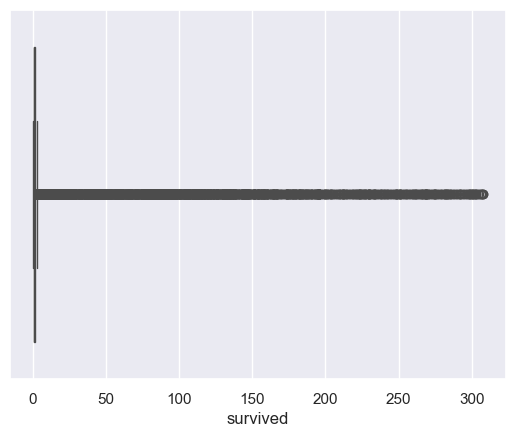

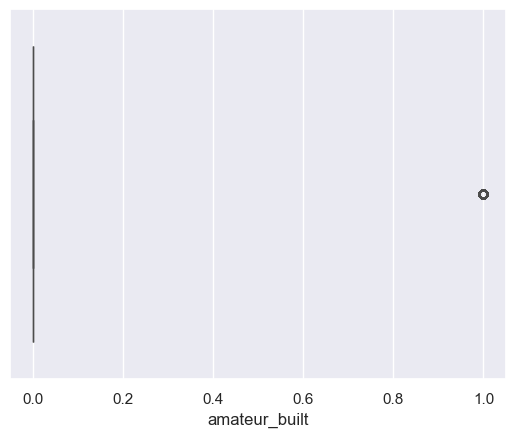

Distribution Analysis - Histogram


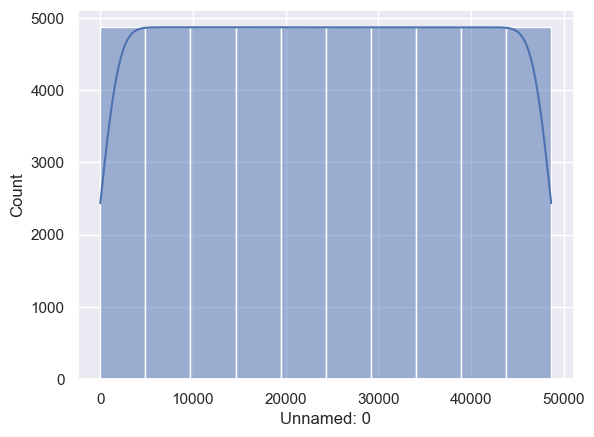

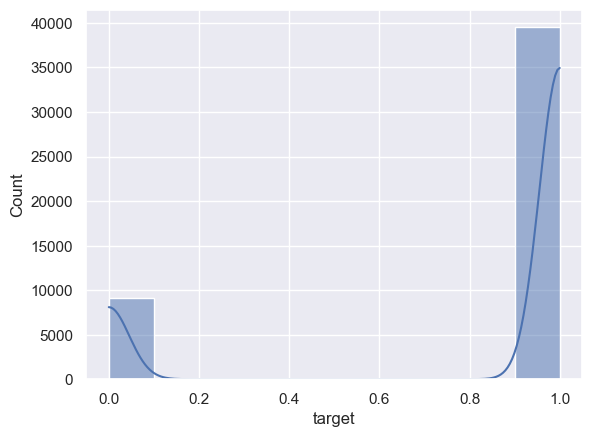

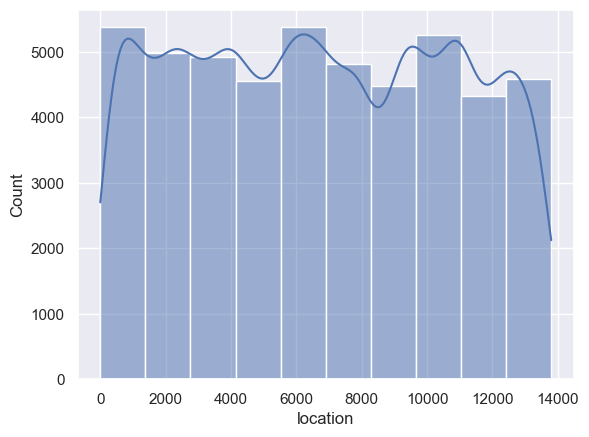

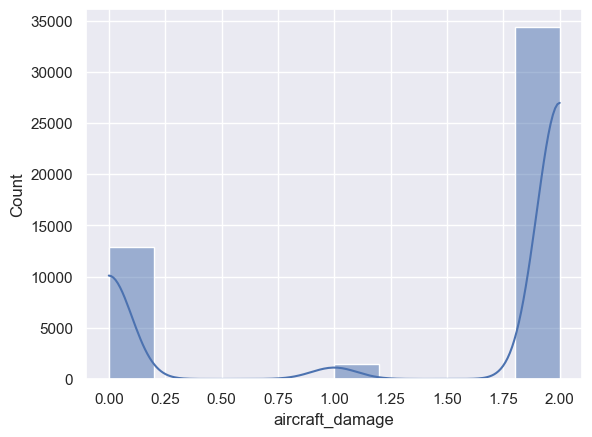

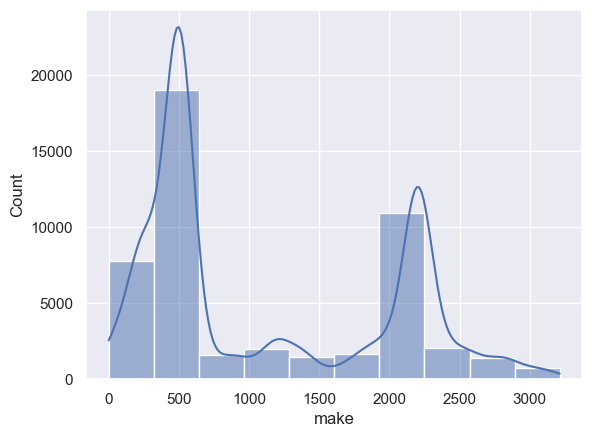

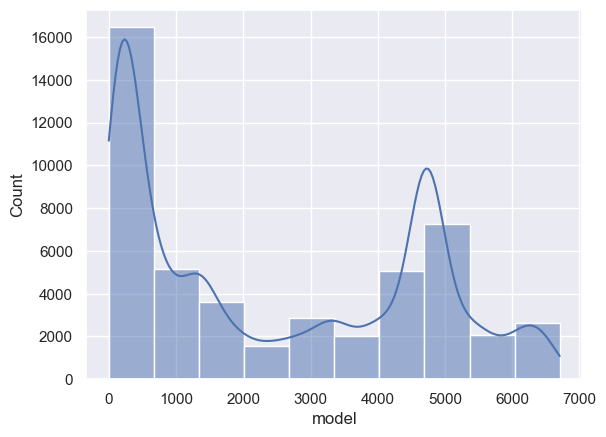

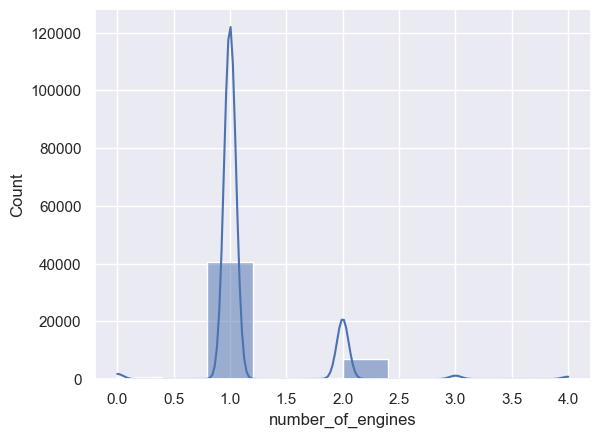

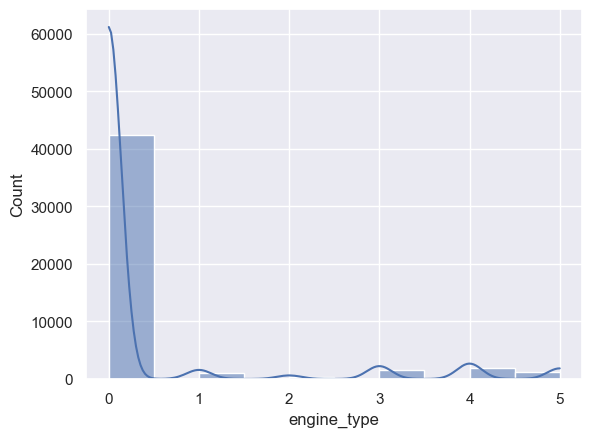

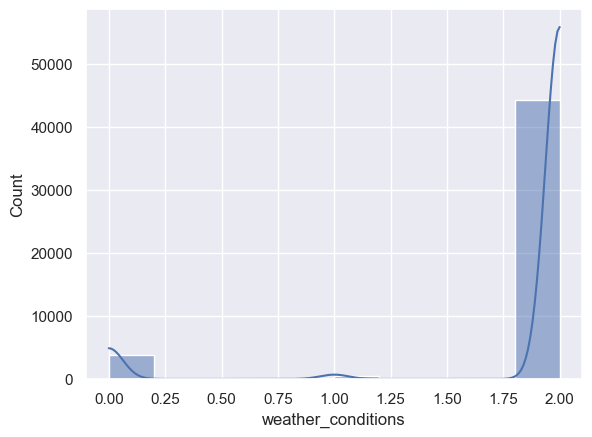

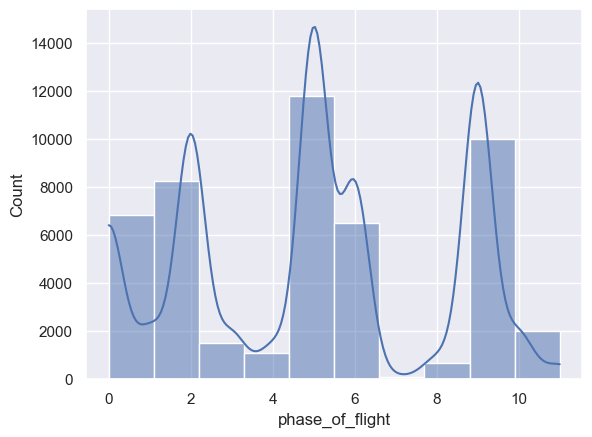

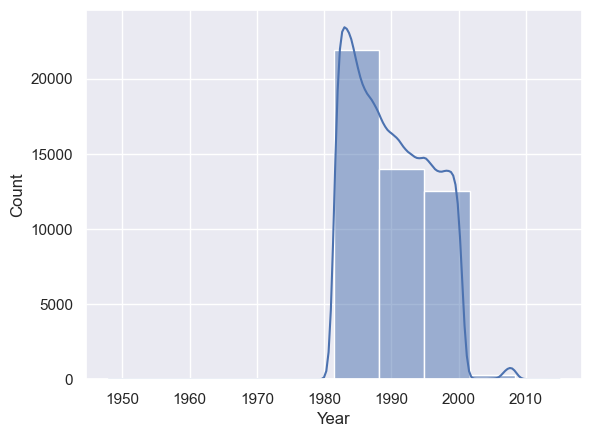

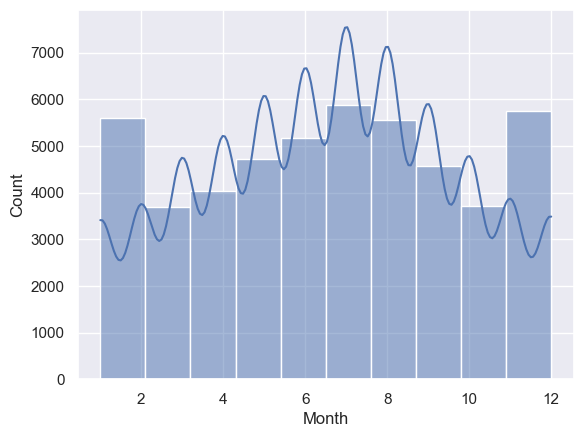

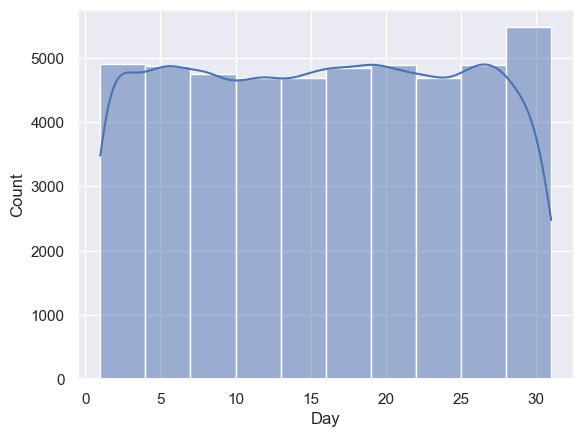

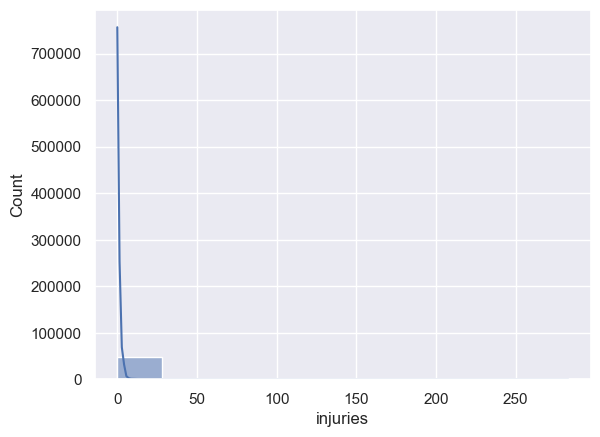

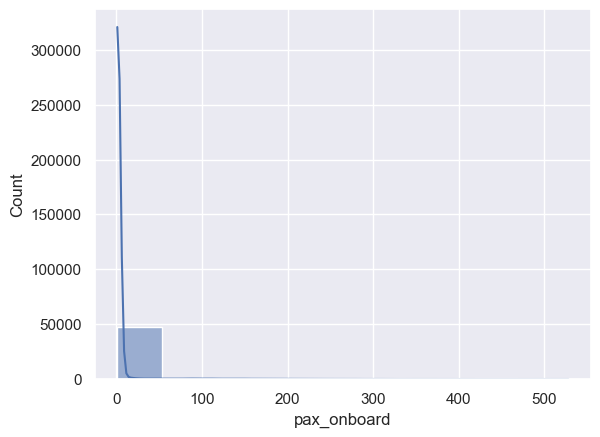

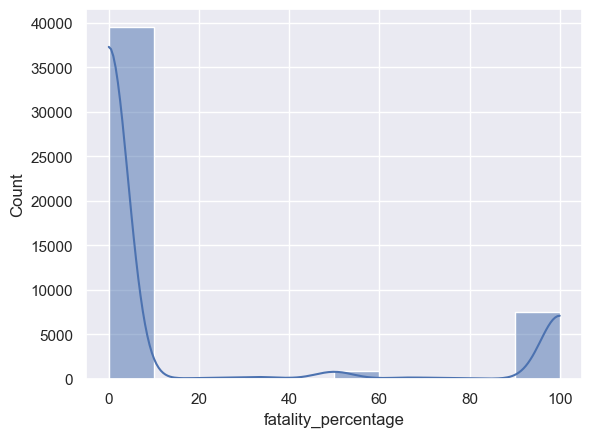

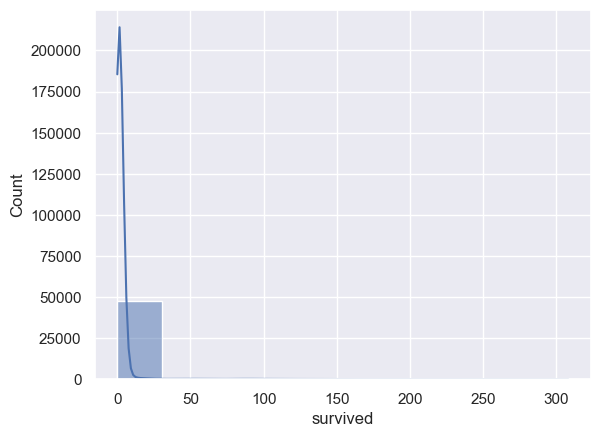

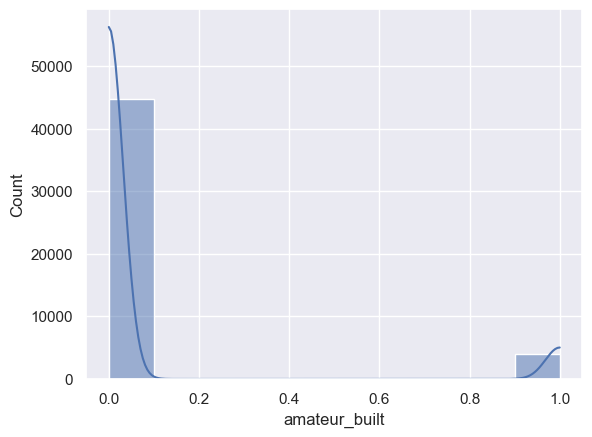

In [15]:
eda_num(data_3)

Outlier Analysis - Boxplot


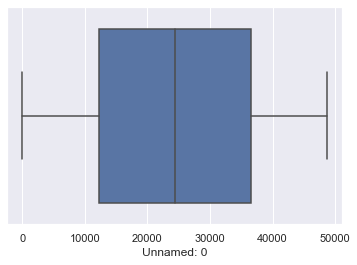

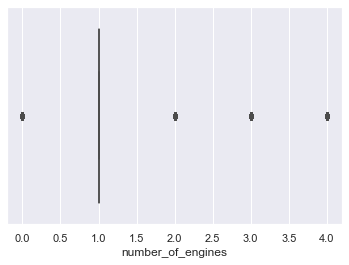

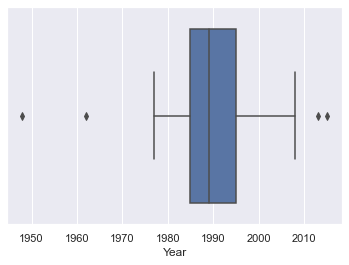

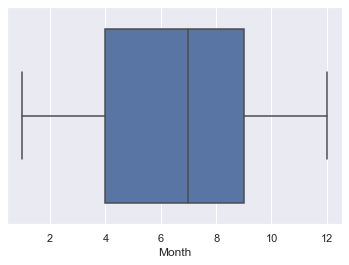

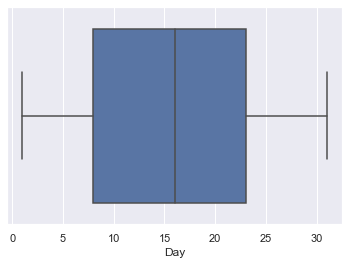

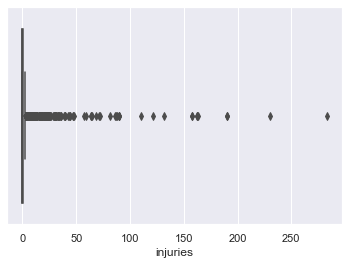

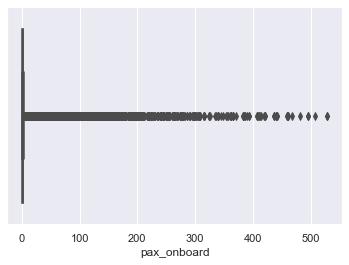

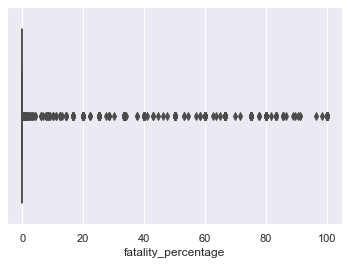

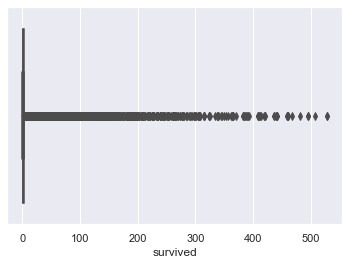

Distribution Analysis - Histogram


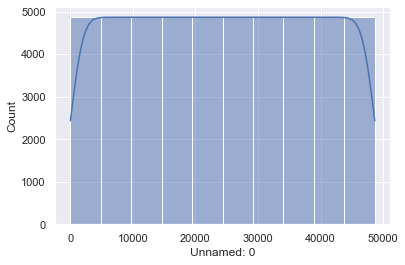

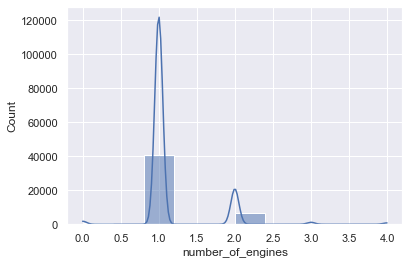

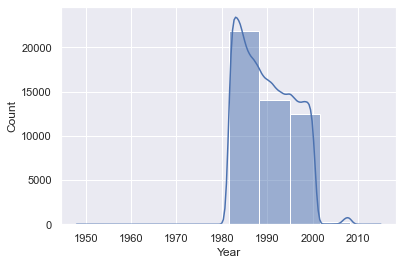

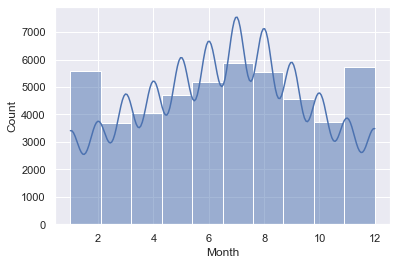

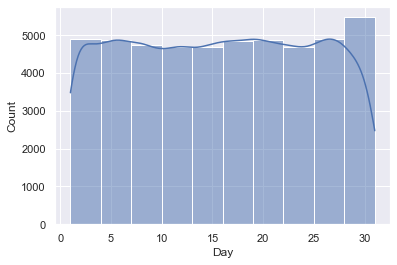

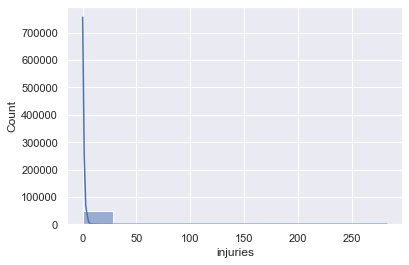

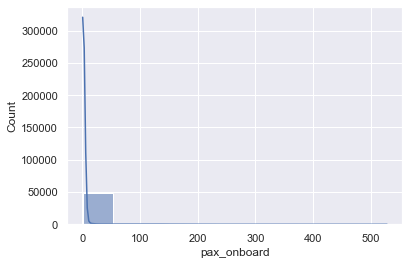

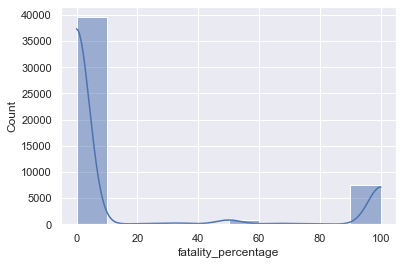

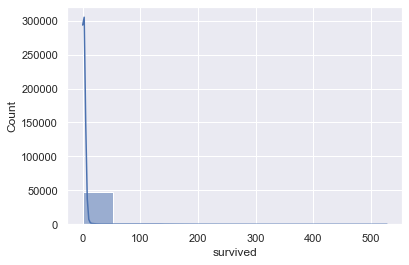

In [11]:
eda_num(data_2)

In [16]:
#select which column to visualize
eda_num(data[['column_1', 'columns_2', 'column_n']])

KeyError: "None of [Index(['column_1', 'columns_2', 'column_n'], dtype='object')] are in the [columns]"

In [17]:
eda_num(data_3, method="correlation")


Correlation Analysis - Heatmap


c:\Users\Makara PC\.conda\envs\ml-practice\Lib\site-packages\quickda\explore_numeric.py:30: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,Unnamed: 0,target,location,aircraft_damage,make,model,number_of_engines,engine_type,weather_conditions,phase_of_flight,Year,Month,Day,injuries,pax_onboard,fatality_percentage,survived,amateur_built
Unnamed: 0,1.00,-0.02,0.01,-0.01,0.93,0.52,-0.07,-0.08,0.02,0.01,-0.06,0.01,-0.00,-0.01,-0.07,0.02,-0.08,0.16
target,-0.02,1.00,0.00,0.64,-0.03,-0.07,-0.03,0.01,0.30,0.08,-0.01,-0.02,0.01,-0.22,0.04,-0.97,0.08,-0.09
location,0.01,0.00,1.00,0.01,0.01,0.01,-0.03,-0.01,0.01,-0.00,0.01,-0.01,0.00,-0.00,-0.03,-0.00,-0.03,0.01
aircraft_damage,-0.01,0.64,0.01,1.00,-0.02,-0.07,-0.07,-0.03,0.26,0.07,0.05,-0.01,-0.00,-0.19,-0.02,-0.64,0.01,-0.07
make,0.93,-0.03,0.01,-0.02,1.00,0.61,-0.04,-0.02,0.01,0.01,0.02,0.01,-0.00,-0.00,-0.05,0.04,-0.05,0.17
model,0.52,-0.07,0.01,-0.07,0.61,1.00,-0.00,0.04,-0.02,-0.01,0.03,0.02,-0.01,0.01,-0.03,0.07,-0.03,0.24
number_of_engines,-0.07,-0.03,-0.03,-0.07,-0.04,-0.00,1.00,0.16,-0.14,-0.03,0.02,-0.02,-0.00,0.12,0.44,0.03,0.44,-0.10
engine_type,-0.08,0.01,-0.01,-0.03,-0.02,0.04,0.16,1.00,-0.02,-0.04,0.04,-0.00,-0.01,0.05,0.11,-0.02,0.11,-0.07
weather_conditions,0.02,0.30,0.01,0.26,0.01,-0.02,-0.14,-0.02,1.00,0.17,0.02,0.01,0.00,-0.10,-0.04,-0.31,-0.03,0.07
phase_of_flight,0.01,0.08,-0.00,0.07,0.01,-0.01,-0.03,-0.04,0.17,1.00,-0.01,0.00,-0.00,-0.04,-0.00,-0.08,0.00,0.02


In [18]:
data_2.columns

Index(['Unnamed: 0', 'target', 'location', 'aircraft_damage', 'make', 'model',
       'number_of_engines', 'engine_type', 'weather_conditions',
       'phase_of_flight', 'Year', 'Month', 'Day', 'injuries', 'pax_onboard',
       'fatality_percentage', 'survived', 'amateur_built'],
      dtype='object')

Bar Plot of aircraft_damage


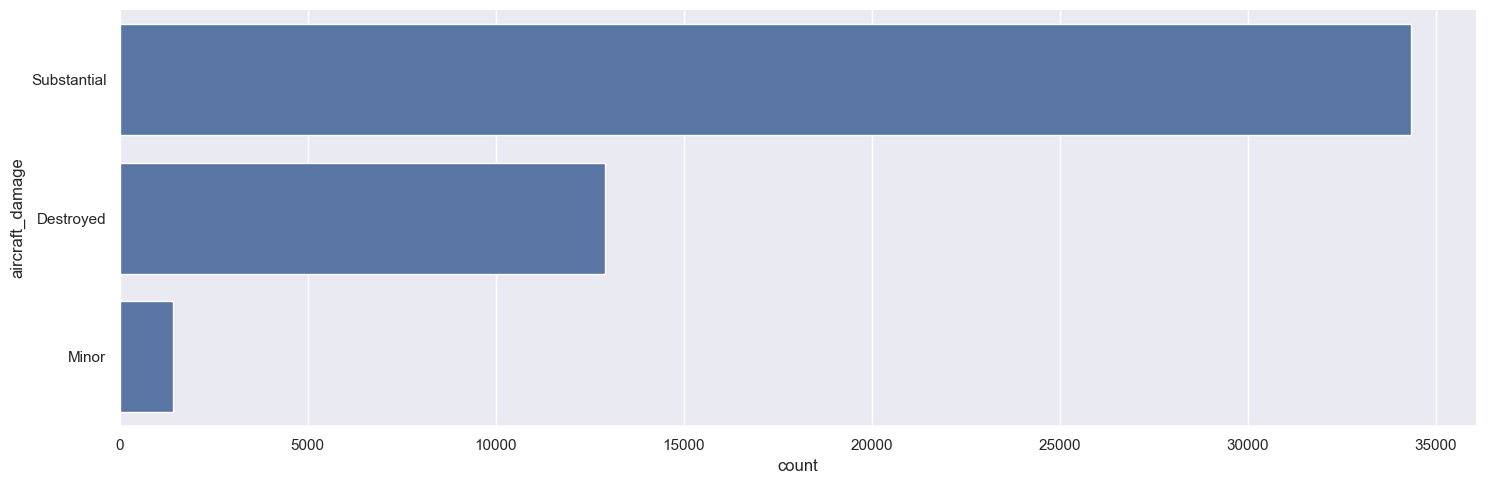

Summary of aircraft_damage


,count,relative_pct
Substantial,34341,0.71
Destroyed,12901,0.27
Minor,1419,0.03


In [19]:
eda_cat(data, x='aircraft_damage')


Bar Plot of engine_type with respect to target


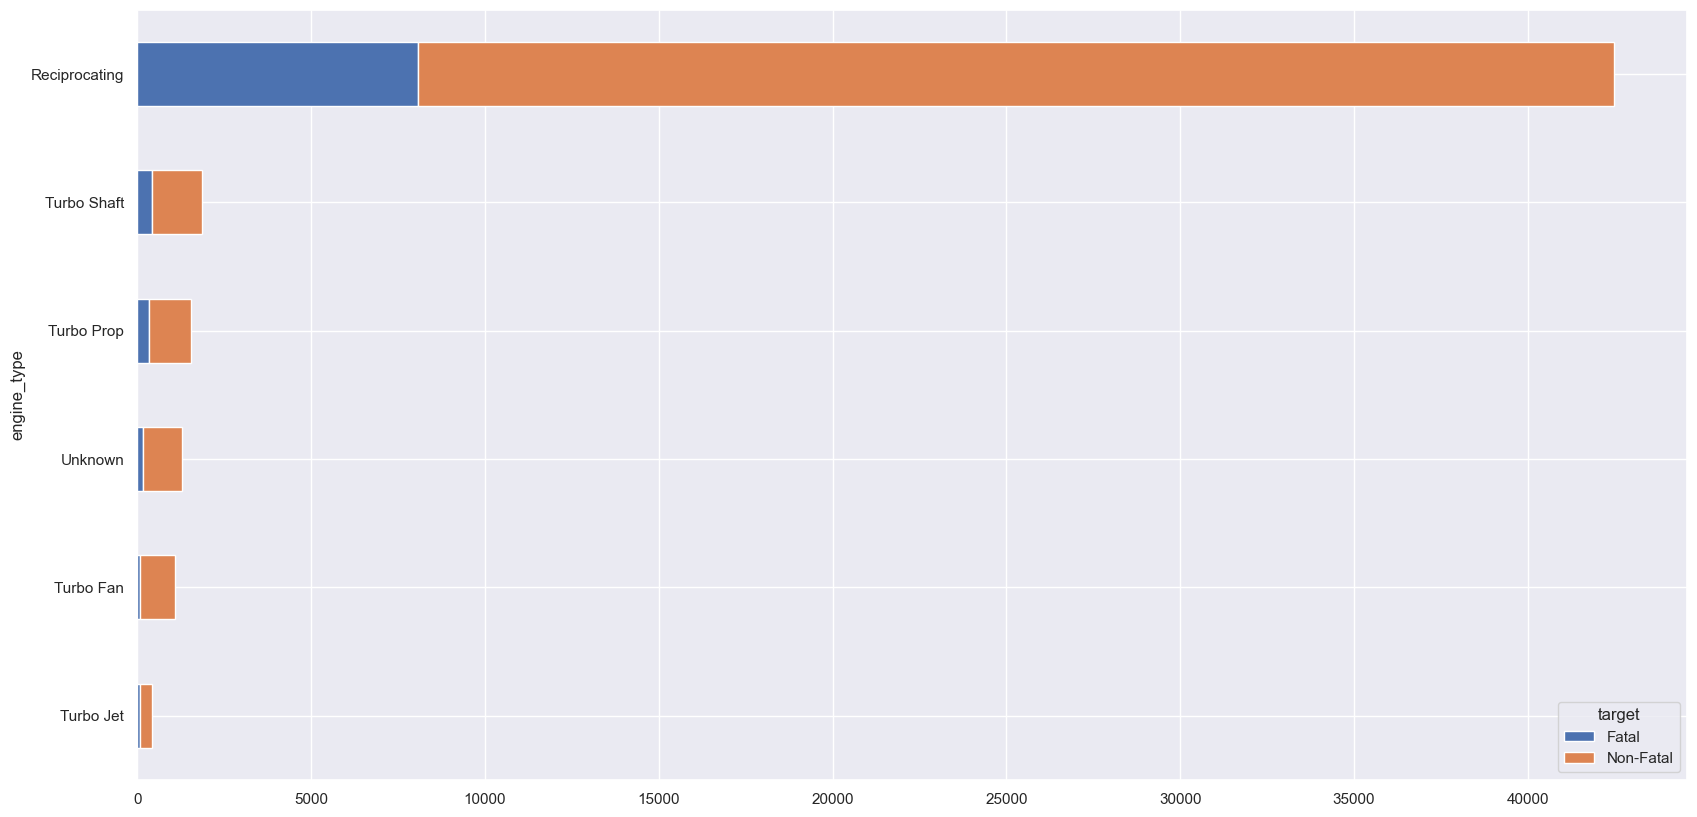

Crosstabulation of engine_type across target


target,Fatal,Non-Fatal
engine_type,,
Reciprocating,0.19,0.81
Turbo Shaft,0.22,0.78
Turbo Prop,0.22,0.78
Unknown,0.12,0.88
Turbo Fan,0.08,0.92
Turbo Jet,0.17,0.83


In [20]:
eda_cat(data_2, x='engine_type', y='target')


Bar Plot of phase_of_flight with respect to target


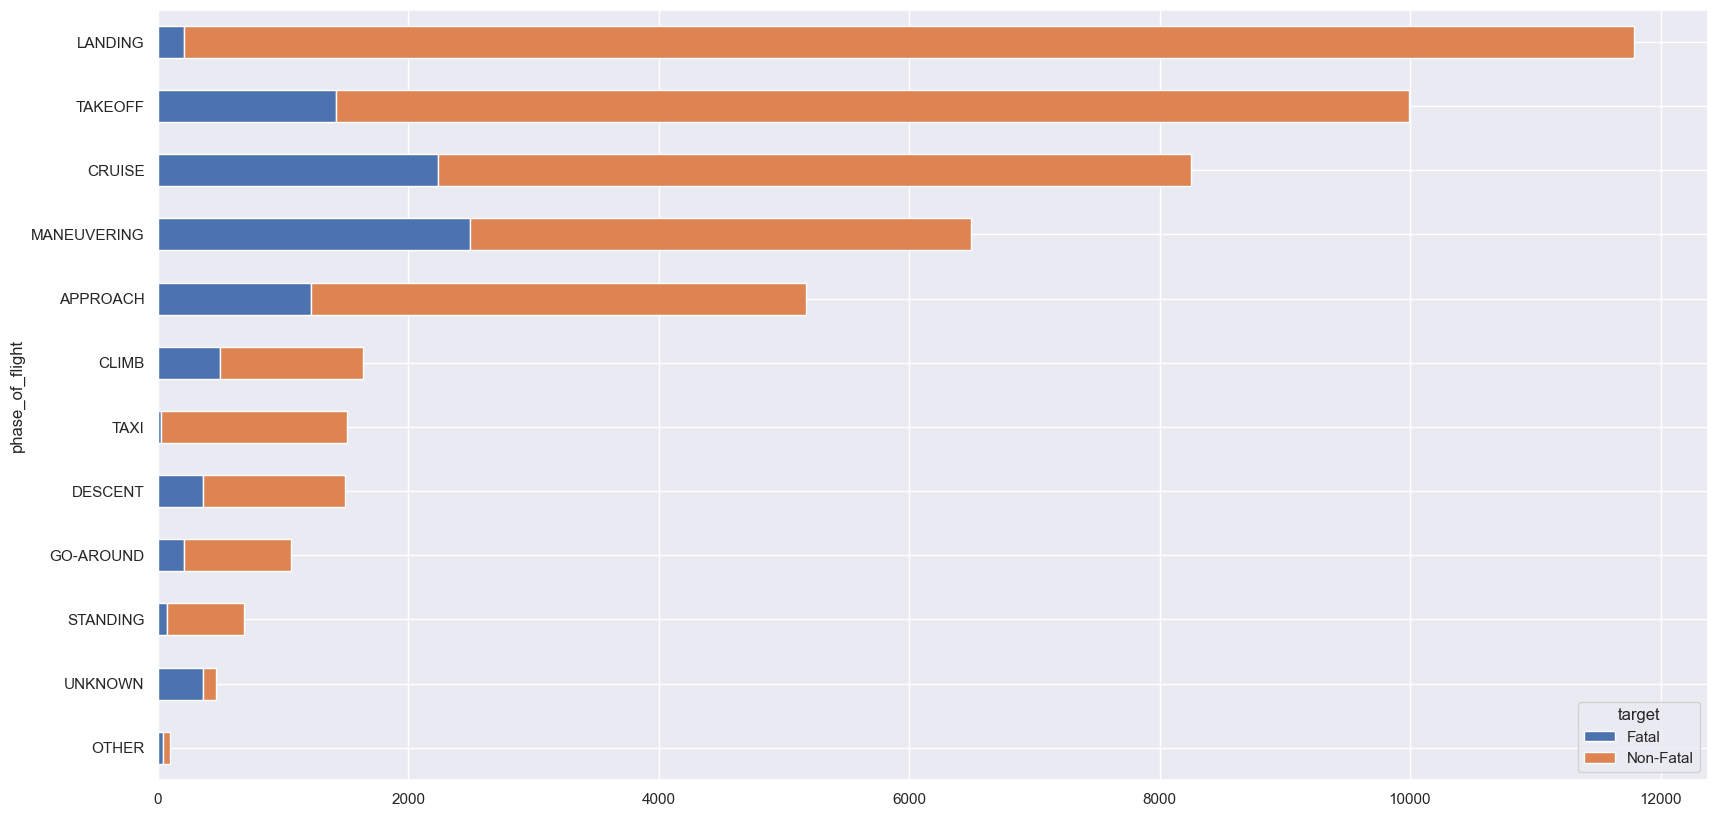

Crosstabulation of phase_of_flight across target


target,Fatal,Non-Fatal
phase_of_flight,,
LANDING,0.02,0.98
TAKEOFF,0.14,0.86
CRUISE,0.27,0.73
MANEUVERING,0.38,0.62
APPROACH,0.24,0.76
CLIMB,0.30,0.70
TAXI,0.02,0.98
DESCENT,0.24,0.76
GO-AROUND,0.19,0.81


In [21]:
eda_cat(data_2, x='phase_of_flight', y='target')


Bar Plot of aircraft_damage with respect to target


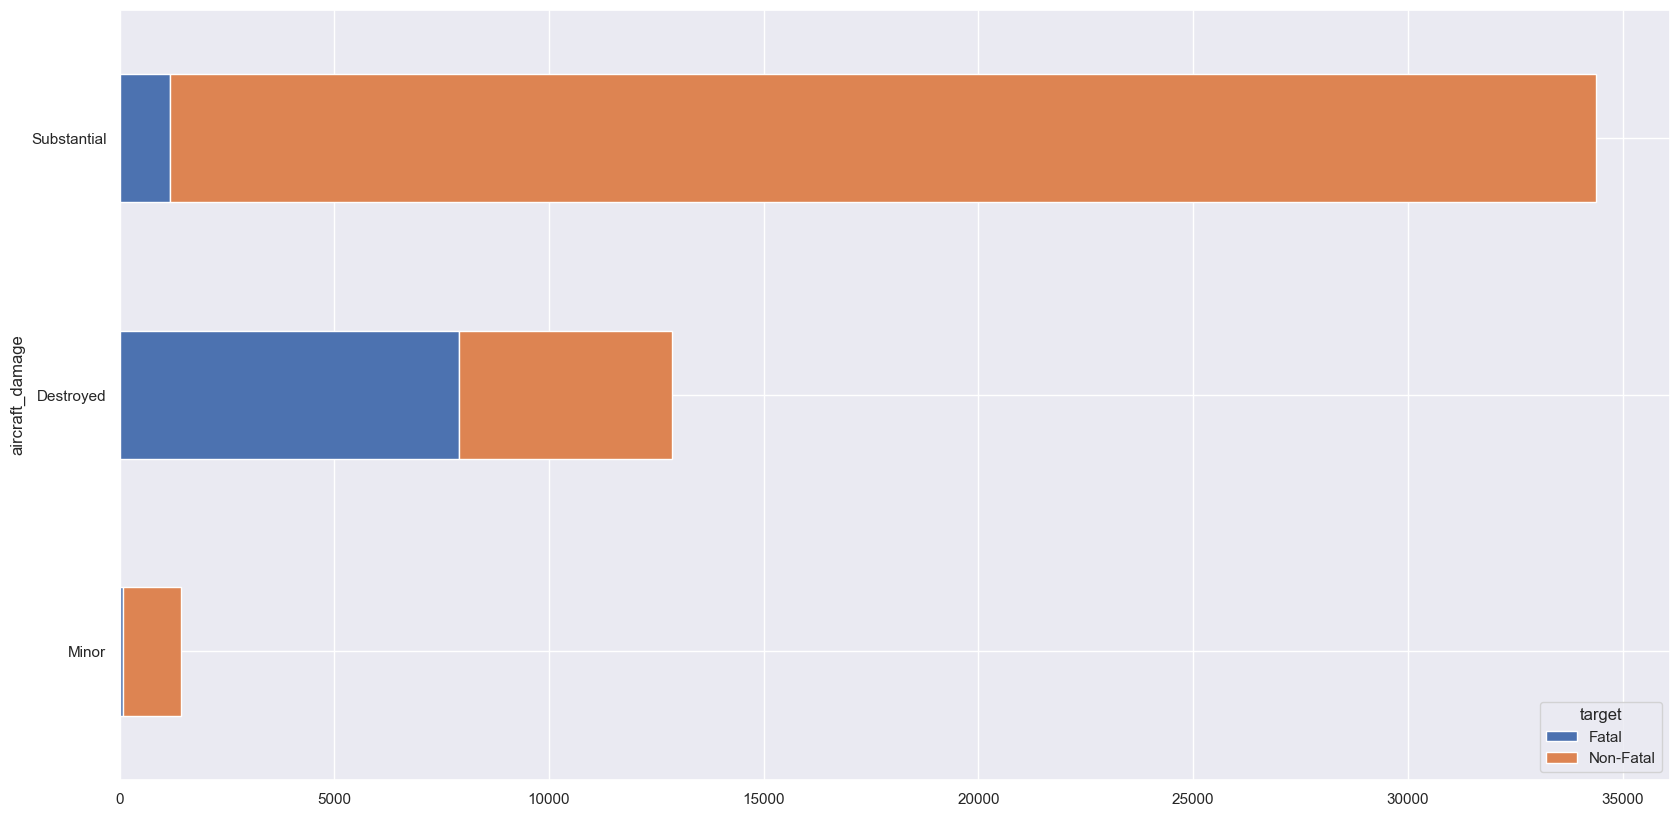

Crosstabulation of aircraft_damage across target


target,Fatal,Non-Fatal
aircraft_damage,,
Substantial,0.03,0.97
Destroyed,0.61,0.39
Minor,0.05,0.95


In [22]:
eda_cat(data_2, x='aircraft_damage', y='target')


Feature Importance in the prediction of target


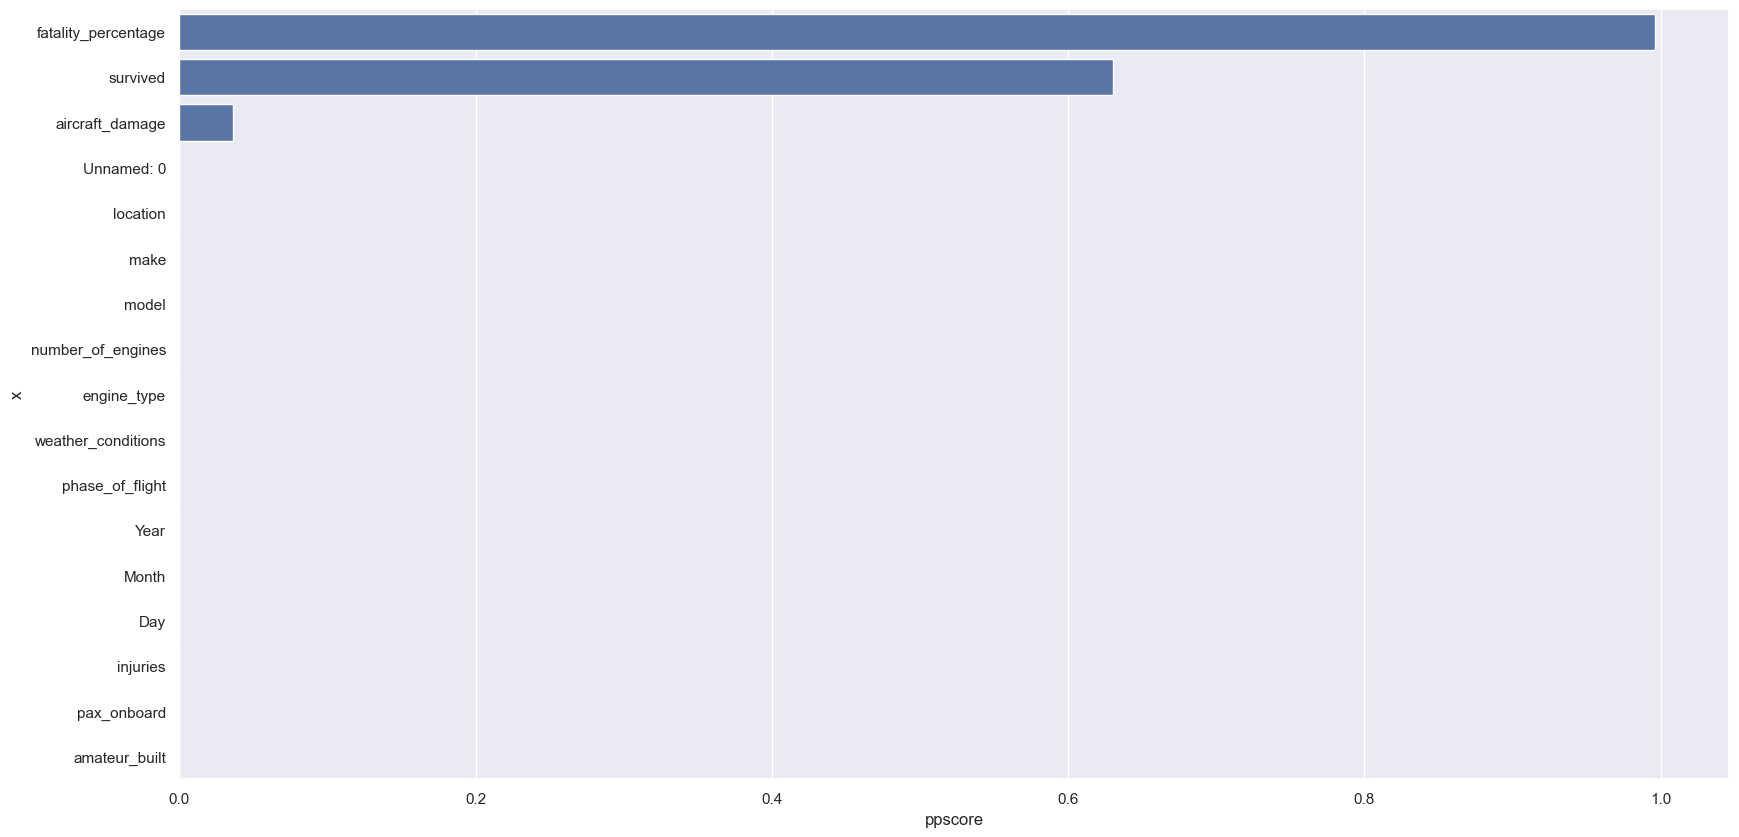

In [24]:
eda_numcat(data_3, 'target', method="pps")

Scatterplot of target versus fatality_percentage


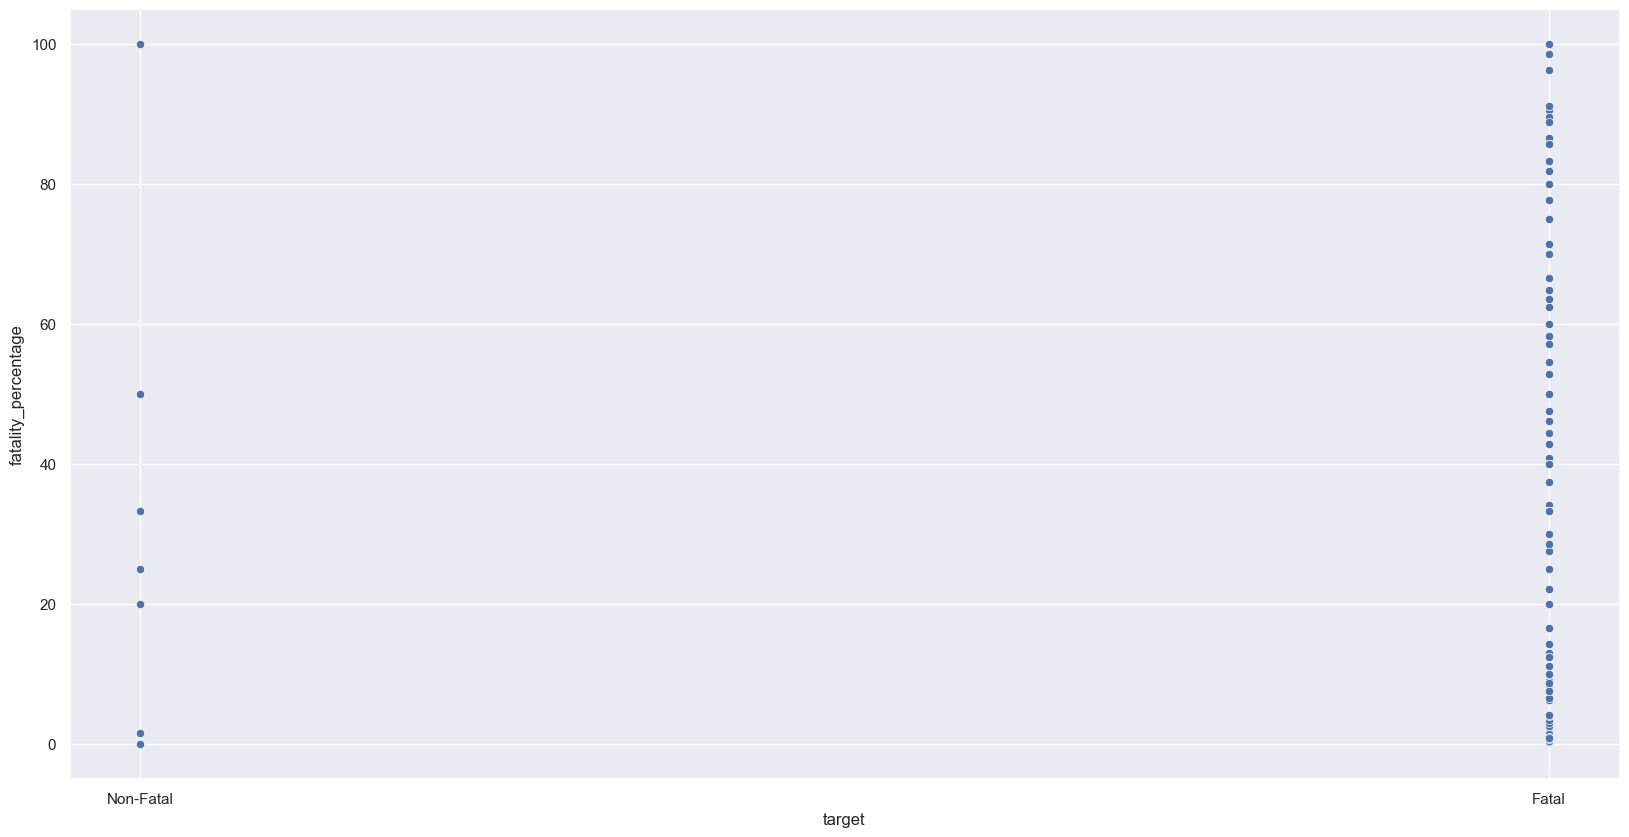

In [25]:
eda_numcat(data_2, x='target', y='fatality_percentage', 
           hue=None, method='relationship')

Scatterplot of Year versus fatality_percentage


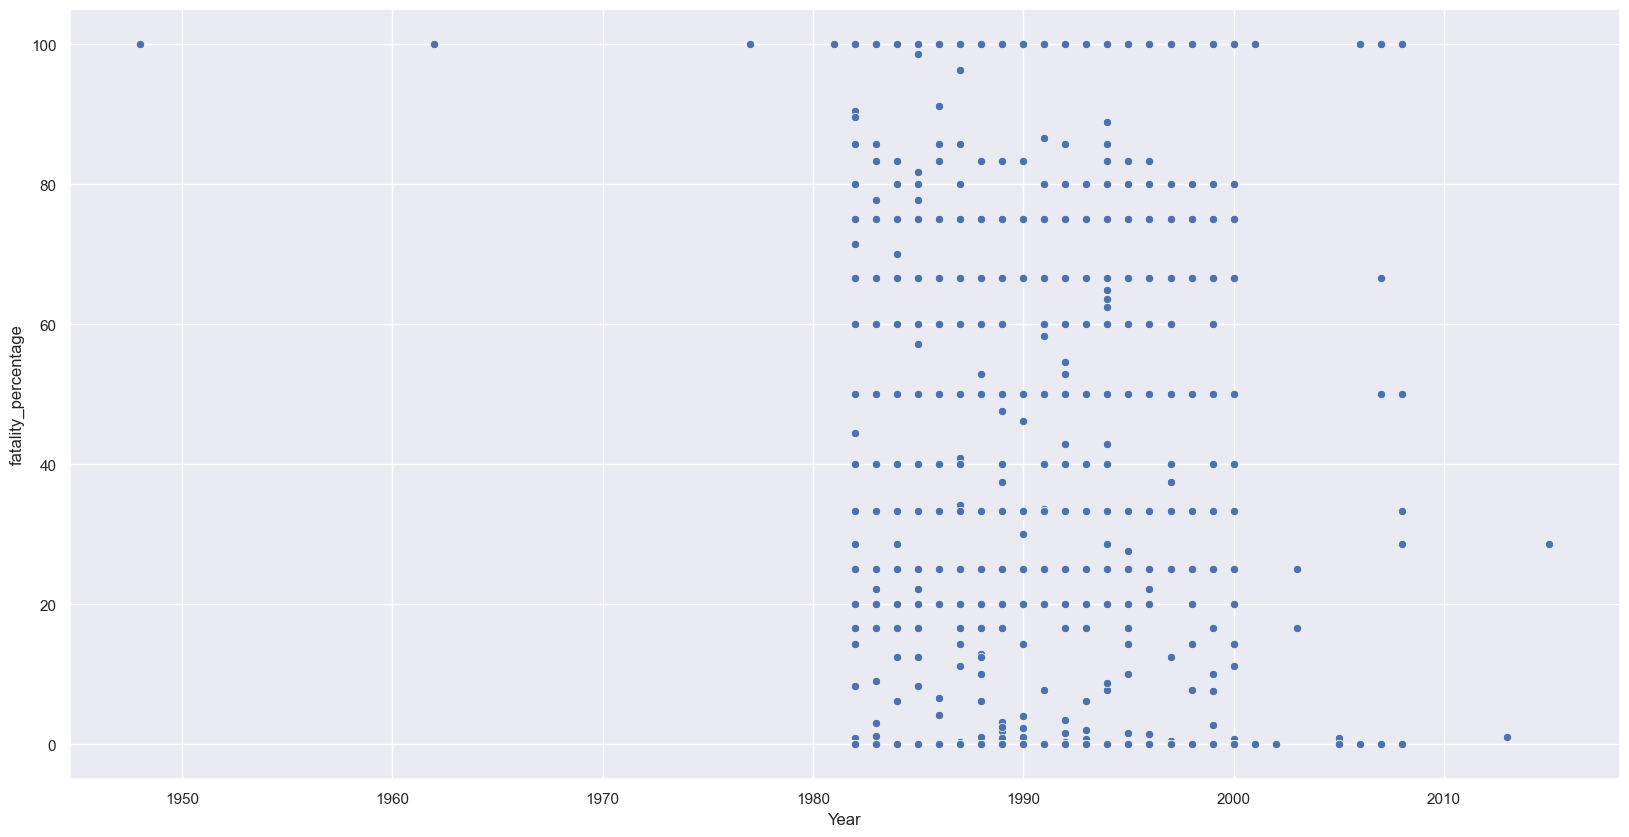

In [26]:
eda_numcat(data_3, x='Year', y='fatality_percentage', 
           hue=None, method='relationship')

In [27]:
data_3.columns

Index(['Unnamed: 0', 'target', 'location', 'aircraft_damage', 'make', 'model',
       'number_of_engines', 'engine_type', 'weather_conditions',
       'phase_of_flight', 'Year', 'Month', 'Day', 'injuries', 'pax_onboard',
       'fatality_percentage', 'survived', 'amateur_built'],
      dtype='object')

In [28]:
test = eda_timeseries(data_2, x='year', y='fatality_percentage')

Distribution - Time Series Data
'year'


In [29]:
data_2.head()

,Unnamed: 0,target,location,aircraft_damage,make,model,number_of_engines,engine_type,weather_conditions,phase_of_flight,Year,Month,Day,injuries,pax_onboard,fatality_percentage,survived,amateur_built
0,0,Non-Fatal,"CAMBRIA, NY",Destroyed,Unknown,64,1.0,Reciprocating,VMC,CLIMB,1982,6,13,1.0,1.0,0.0,1.0,No
1,1,Non-Fatal,"MCWHORTER, KY",Destroyed,Unknown,KR-2,1.0,Reciprocating,VMC,CRUISE,1982,7,1,2.0,2.0,0.0,2.0,Yes
2,2,Fatal,"FREDERICK, MD",Destroyed,Unknown,WINDWAGON,1.0,Reciprocating,VMC,APPROACH,1982,7,16,1.0,1.0,100.0,0.0,Yes
3,3,Non-Fatal,"VENTURA, CA",Destroyed,Unknown,MIDGET MUSTANG,1.0,Reciprocating,VMC,MANEUVERING,1982,8,21,0.0,1.0,0.0,1.0,Yes
4,4,Non-Fatal,"SIDNEY, NE",Substantial,Unknown,SKYBOLT,1.0,Reciprocating,VMC,LANDING,1982,8,24,0.0,1.0,0.0,1.0,Yes


<Axes: ylabel='fatality_percentage'>

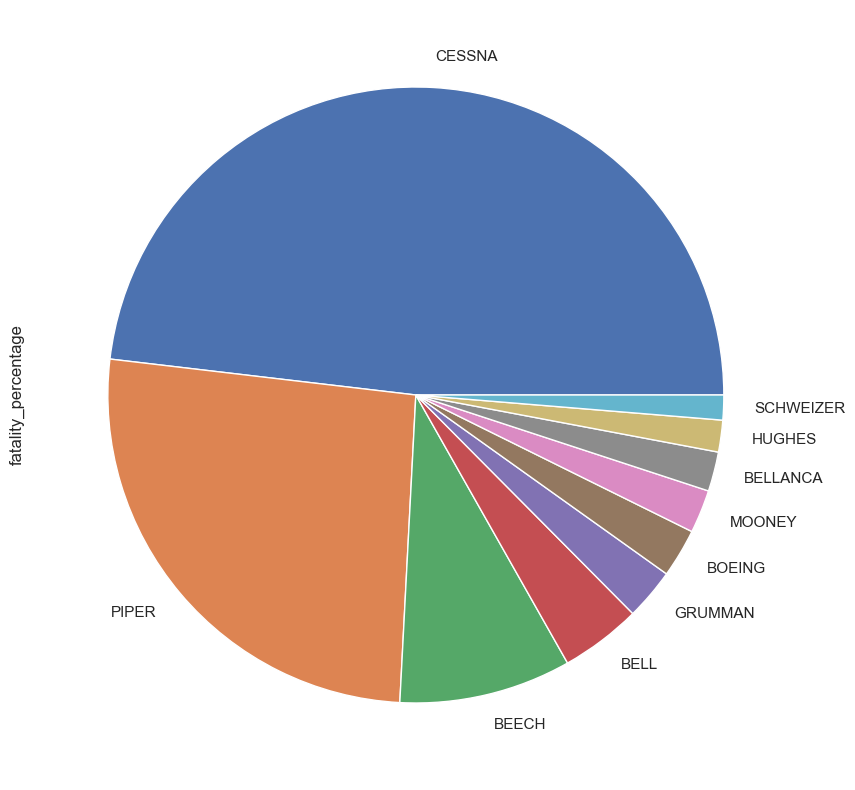

In [30]:
data_2.groupby('make')['fatality_percentage'].count().nlargest(10).plot(kind='pie')